# This notebook contains charts and functions that work with the case data

In [106]:
"""
Loads and translates data
"""
import matplotlib.pyplot as plt
import pandas as pd
import translate as t

# Reads the translated data
df = pd.read_csv('../main_data.csv')
df = t.translate(df)
df.to_csv('translated.csv', index=False)
print(df.tail())

            user                                     case        time
8795  AJ***-JSAN    Paris 2023 Contenders Sticker Capsule  1698635791
8796  S4***-QHYQ     Paris 2023 Legends Autograph Capsule  1698635790
8797  AK***-FFWJ  Paris 2023 Contenders Autograph Capsule  1698635789
8798  AN***-8GNN                              Recoil Case  1698635789
8799  S8***-YMXA                           Snakebite Case  1698635788


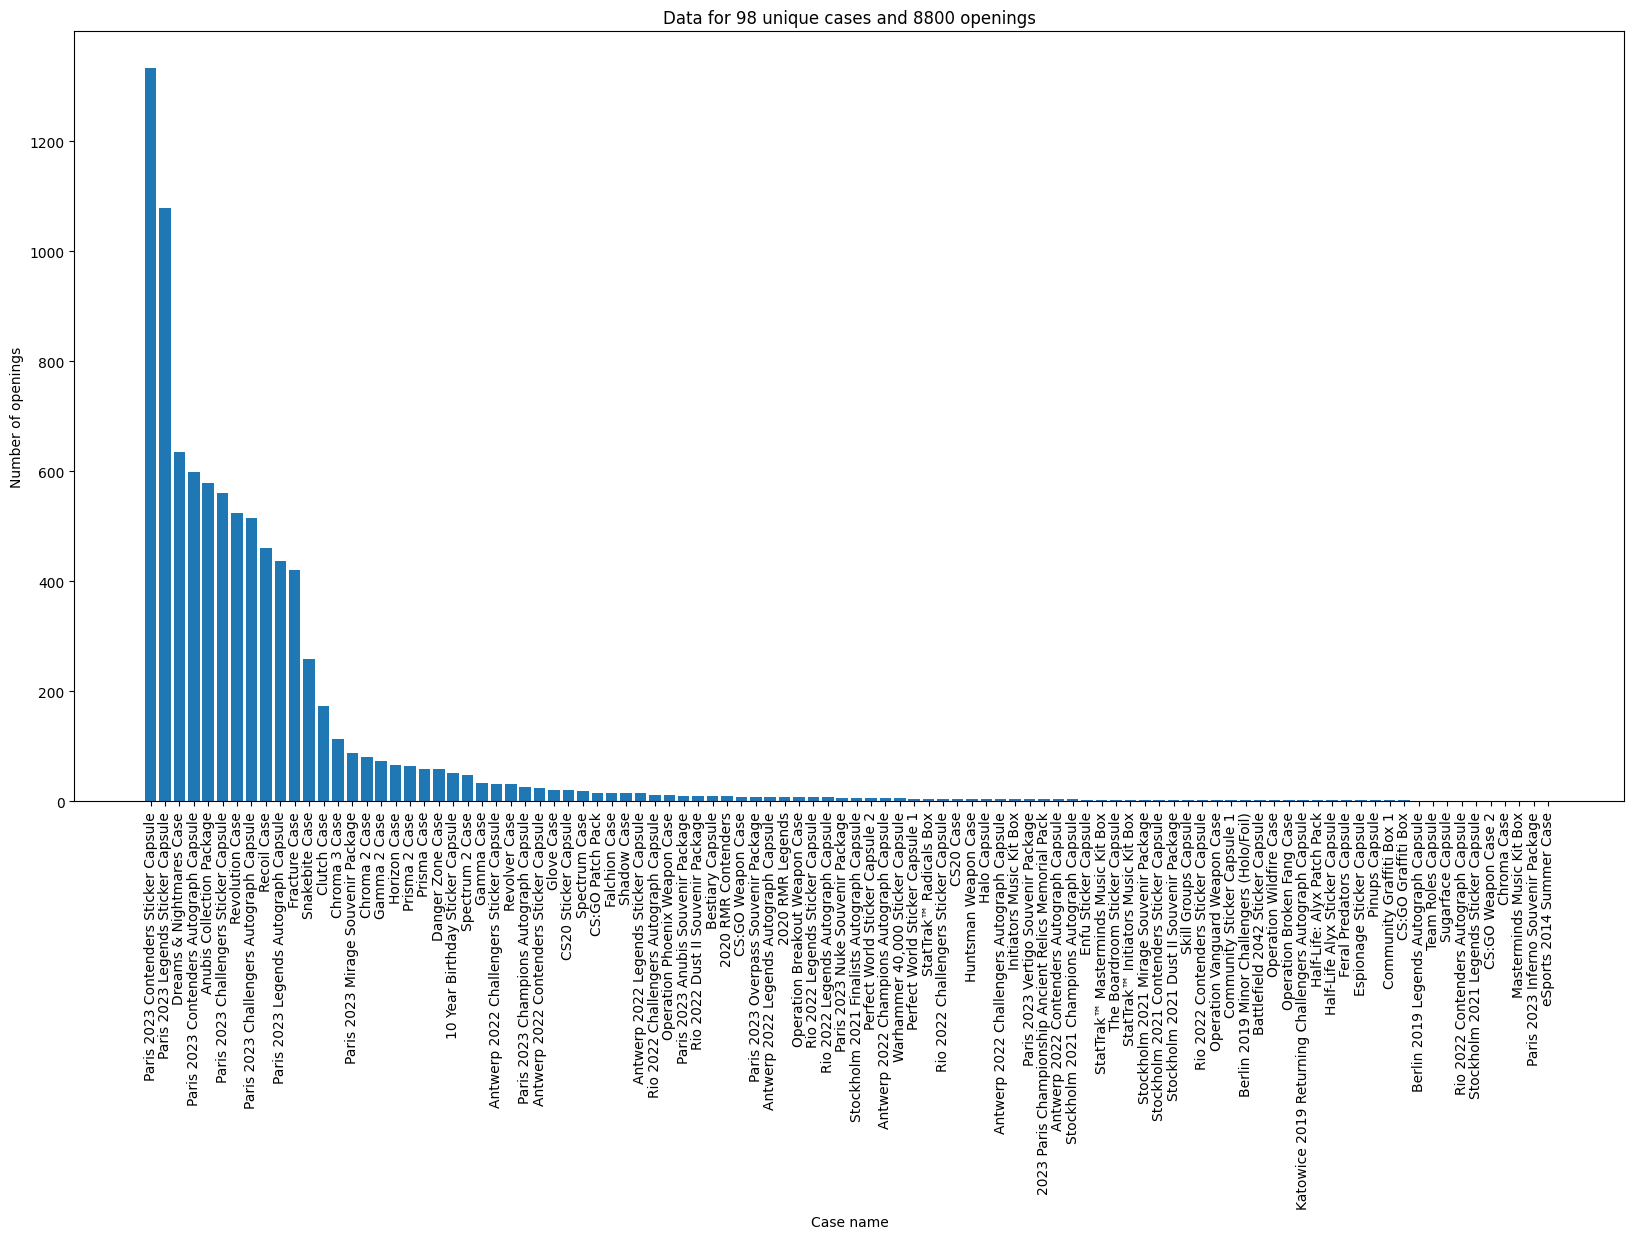

In [107]:
"""
Plots the total number of openings for each case.
"""

# Group data by case name
grouped = df.copy()
grouped = grouped.groupby(['case']).size().reset_index(name='count')
grouped.sort_values(by=['count'], inplace=True, ascending=False)
unique_cases = grouped.shape[0]

# Plot the data
plt.figure(figsize=(20, 10))
plt.bar(grouped['case'], grouped['count'])
plt.xticks(rotation=90)
plt.title(f"Data for {unique_cases} unique cases and {grouped['count'].sum()} openings")
plt.xlabel('Case name')
plt.ylabel('Number of openings')
plt.show()






Filtering data


<Axes: xlabel='time'>

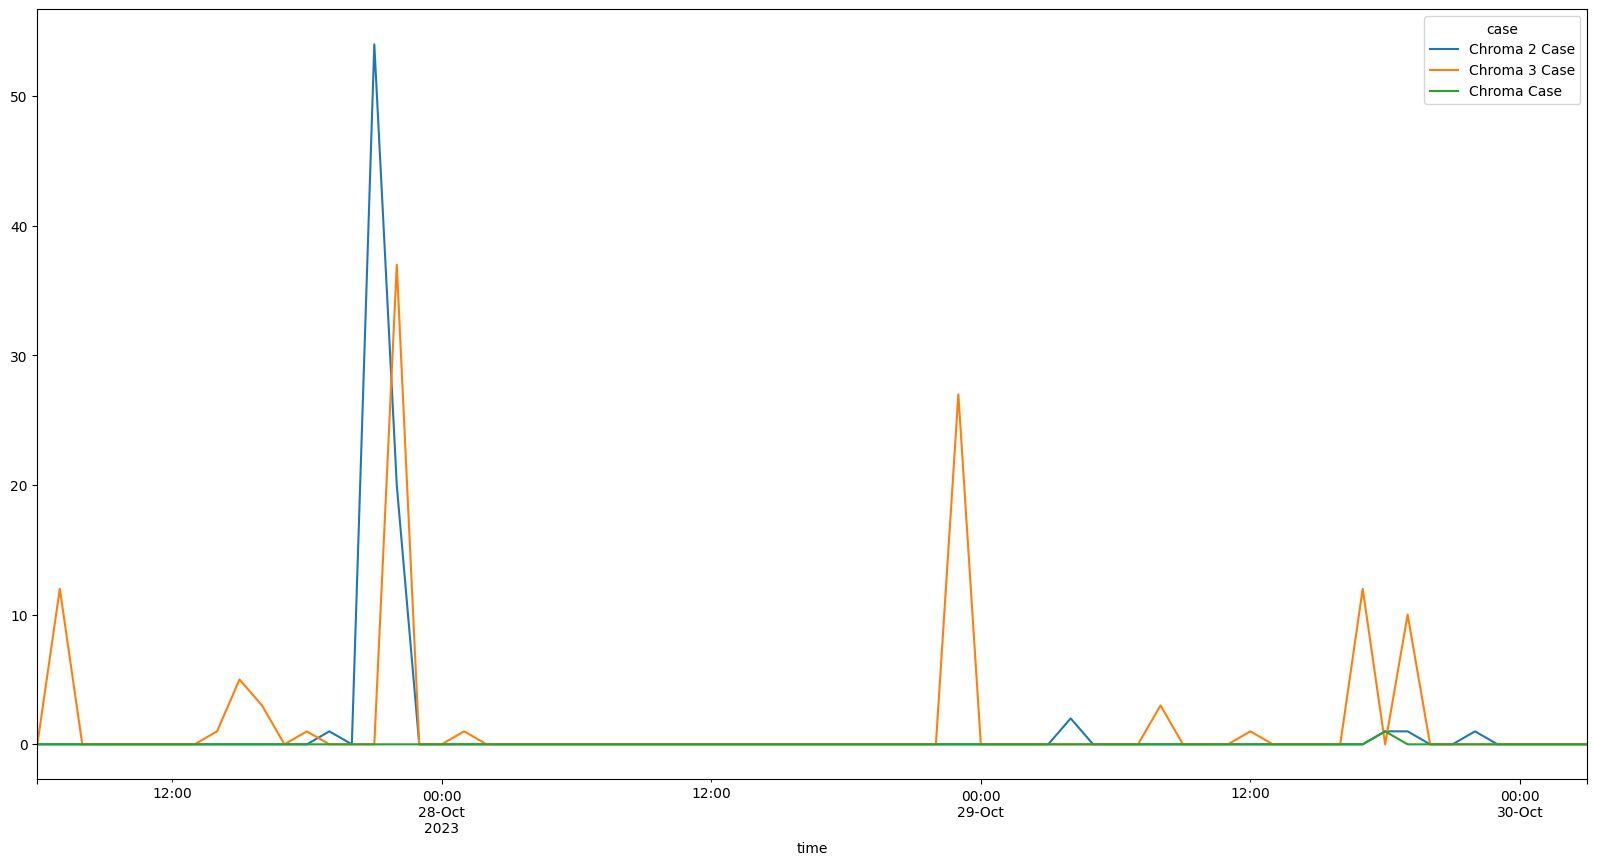

In [111]:
"""
Converts data to time series and plots cumulative case openings over time
"""

series = df.copy()
series['time'] = pd.to_datetime(series['time'], unit='s')
series = series.pivot_table(index='time', columns='case', values='user',aggfunc='count', fill_value=0)
series = series.resample('H').sum()

if input("Would you like to filter the data? Y/N ").lower() == ("y"):
    print("Filtering data")
    # ask use for input to filter data
    filter = input("Enter filter: ")

    series = series.filter(like=filter,axis=1)
    


#series = series.cumsum()
series.plot(figsize=(20, 10))